Lo primero que hacemos es instalar las diferentes librerías que nos ayudaran a generar la regresión lineal

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Se importan las librerias 

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


Se ingresa el la base de datos con la que vamos a trabajar. En este caso se va a usar un registro de presios de las diferentes acciones del S&P 500. Este data set se transforma en un dataframe con el cual vamos a trabajar.

In [9]:
datos = "all_stocks_5yr.csv"
df = pd.read_csv(datos)
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [10]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo

# For time stamps
from datetime import datetime

Se filtra la acción de amazón para acortar el tamaño de los datos

In [11]:
#Filtrado de el dataset por la Acción de AMAZON
df_filtrado = df[df['Name'] == 'AMZN']

In [12]:
df_filtrado.head()

,date,open,high,low,close,volume,Name
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


Se crea un gráfico de dispersion para mirar qué tan dispersos están los puntos com respecto a la media

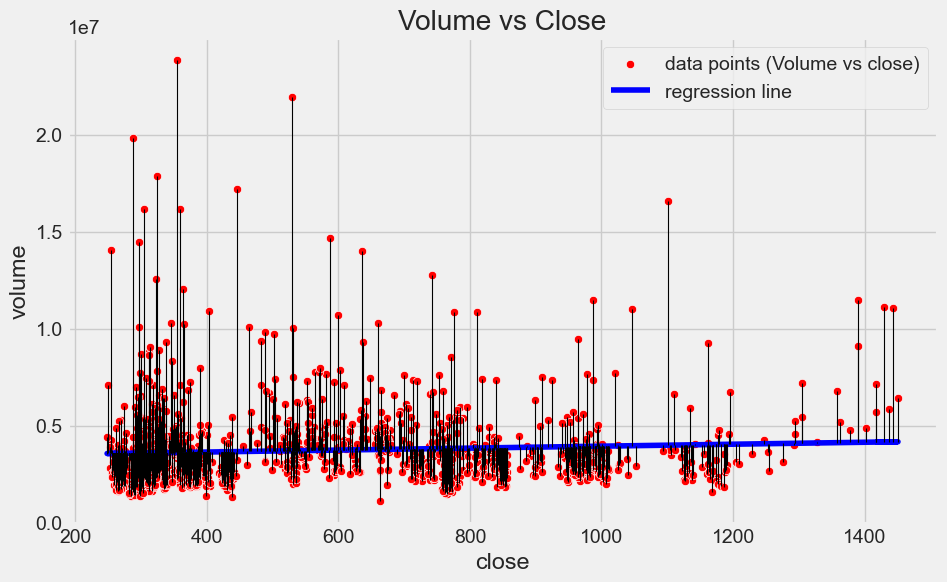

In [13]:
# Crear el gráfico de dispersión con puntos de datos en rojo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='close', y='volume', data=df_filtrado, color='red', label='data points (Volume vs close)')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df_filtrado['close'], df_filtrado['volume'], 1)
plt.plot(df_filtrado['close'], slope * df_filtrado['close'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df_filtrado.iterrows():
    x = row['close']
    y_actual = row['volume']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('close')
plt.ylabel('volume')
plt.title('Volume vs Close')
plt.legend()

# Mostrar el gráfico
plt.show()

En un gráfico de dispersión con puntos alejados significativamente del promedio, es importante identificar si estos valores atípicos son datos erróneos o indicativos de patrones interesantes. Pueden representar valores extremos o errores de medición. Un análisis más profundo, como el cálculo de estadísticas robustas o la aplicación de técnicas de detección de valores atípicos, podría revelar información útil o la necesidad de limpiar los datos. Estos puntos podrían tener un impacto significativo en cualquier análisis estadístico, por lo que es crucial comprender su naturaleza antes de tomar decisiones basadas en ellos.

Se impoprtan otras librerías estadísticas

In [14]:
#importar stats
from scipy import stats

In [15]:
import statsmodels.api as sm

Se llevará a cabo una regresión lineal múltiple, incorporando transformaciones cuadráticas en ciertas variables predictoras clave para un análisis más profundo y preciso

In [16]:
df_filtrado['open'] = pd.to_numeric(df_filtrado['open'], errors='coerce')
df_filtrado['open^2'] = df_filtrado['open'] ** 2

df_filtrado.dropna(subset=['open', 'open^2'], inplace=True)

X = df_filtrado[['open', 'open^2']]
y = df_filtrado['volume']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.450
Date:                Tue, 05 Sep 2023   Prob (F-statistic):             0.0320
Time:                        21:43:28   Log-Likelihood:                -20150.
No. Observations:                1259   AIC:                         4.031e+04
Df Residuals:                    1256   BIC:                         4.032e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.714e+06   3.17e+05     11.715      0.0

/var/folders/_s/f342dwg966zcnyzd3gsv51k80000gn/T/ipykernel_18575/697728079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['open'] = pd.to_numeric(df_filtrado['open'], errors='coerce')
/var/folders/_s/f342dwg966zcnyzd3gsv51k80000gn/T/ipykernel_18575/697728079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['open^2'] = df_filtrado['open'] ** 2
/var/folders/_s/f342dwg966zcnyzd3gsv51k80000gn/T/ipykernel_18575/697728079.py:4: SettingWithCopyWarning: 
A value is trying to be set o

Un coeficiente de determinación (R-cuadrado) de 0.05 indica que solo el 5% de la variabilidad en la variable dependiente se explica por el modelo de regresión. Esto sugiere que el modelo tiene un ajuste deficiente y no puede capturar de manera efectiva la relación entre las variables predictoras y la variable dependiente. Es importante explorar otras variables o modelos más complejos para una mejor explicación del fenómeno estudiado.

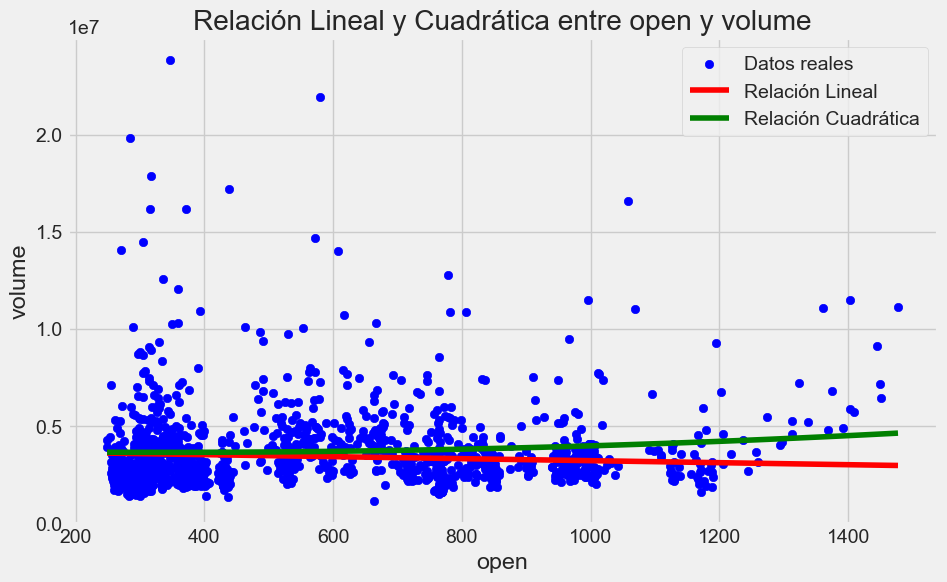

In [17]:
# Definir las variables independientes y dependientes
volume = df_filtrado['volume']
open = df_filtrado['open']
open_squared = df_filtrado['open^2']

# Crear un rango de valores de "open" para la gráfica
open_range = np.linspace(open.min(), open.max(), 100)

# Calcular las predicciones para las relaciones lineal y cuadrática
volume_pred_linear = b0 + b1 * open_range
volume_pred_quadratic = b0 + b1 * open_range + b2 * open_range**2

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.scatter(open, volume, label='Datos reales', color='blue')
plt.plot(open_range, volume_pred_linear, label='Relación Lineal', color='red')
plt.plot(open_range, volume_pred_quadratic, label='Relación Cuadrática', color='green')

# Etiquetas y título
plt.xlabel('open')
plt.ylabel('volume')
plt.title('Relación Lineal y Cuadrática entre open y volume')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

En el análisis visual del gráfico, se destacó la ausencia de una relación lineal discernible entre las variables bajo examen, subrayando la necesidad de explorar otros enfoques para comprender mejor su interacción y efectos.

Se llevará a cabo un análisis exhaustivo de las variables, explorando su comportamiento y relaciones, para determinar la estrategia óptima de regresión. 

In [18]:
df_filtrado.head()

,date,open,high,low,close,volume,Name,open^2
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,68329.9600
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,69274.2400
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,67179.4561
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,68397.9409
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,71486.7169



Se generó un gráfico de dispersión pairwise (entre pares) para visualizar y evaluar las relaciones de correlación entre las distintas variables. Este enfoque es valioso para comprender la estructura de los datos.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/_s/f342dwg966zcnyzd3gsv51k80000gn/T/ipykernel_18575/2543183348.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

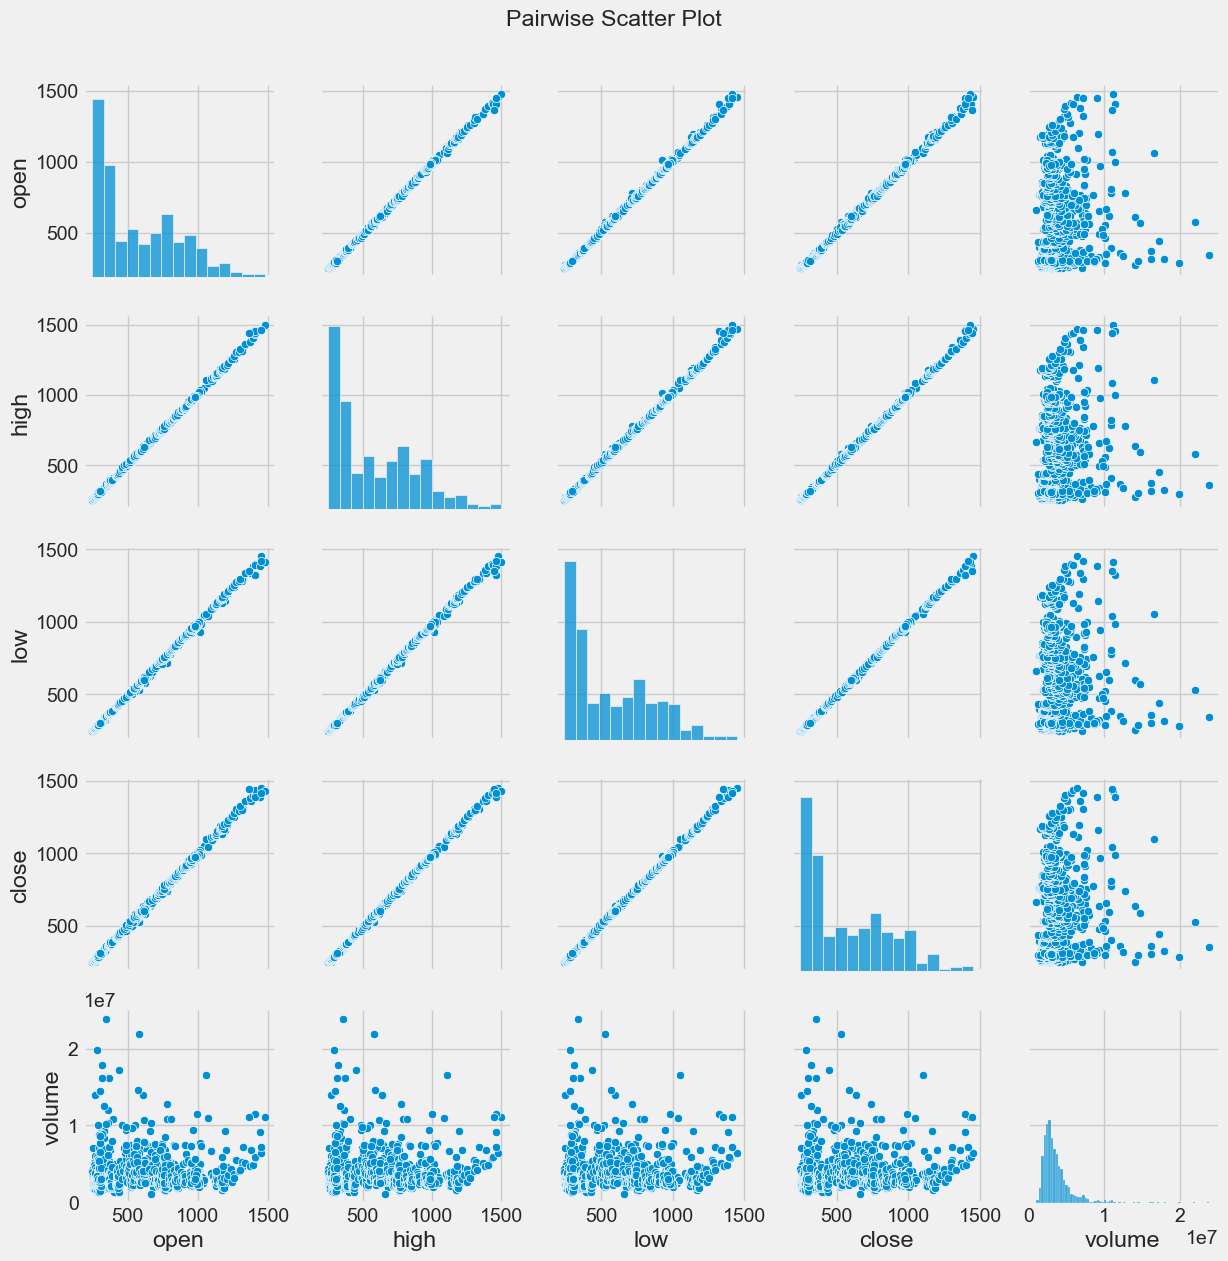

In [19]:
price_columns=['open', 'high','low','close','volume']
plt.figure(figsize=(10,6))
sns.pairplot(data = df_filtrado, vars=price_columns)
plt.suptitle('Pairwise Scatter Plot', y=1.01)
plt.tight_layout()
plt.show()


El gráfico pairwise scatterplot brinda una representación visual esencial que permite identificar patrones de dispersión y evaluar la posible multicolinealidad, ayudando así a tomar decisiones informadas en la selección de variables para el análisis de regresión. En el análisis de las variables, se ha observado una fuerte correlación positiva entre algunas de ellas, lo que sugiere una relación conjunta significativa. Por otro lado, se identificaron pares de variables que parecen carecer de una correlación apreciable, lo que podría indicar independencia o una relación no lineal. 

Se ha generado un mapa de calor para evaluar los niveles de correlación entre las variables en cuestión. Esta visualización proporciona una representación clara de las relaciones entre las variables y ayuda en el proceso de análisis.

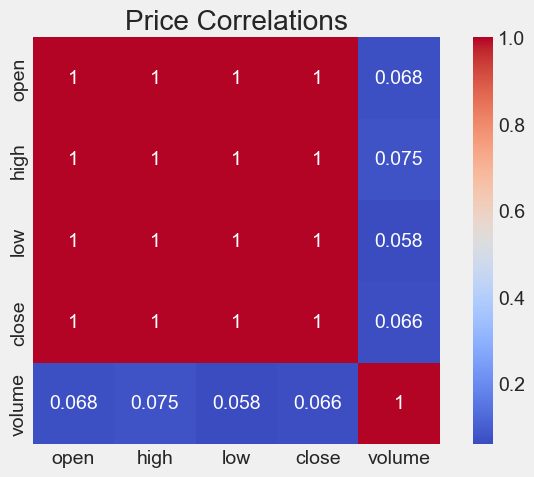

In [20]:
price_correlations= df_filtrado[price_columns].corr()
plt.figure(figsize=(7,5))
sns.heatmap(price_correlations, annot= True, cmap='coolwarm',square= True)
plt.title('Price Correlations')
plt.tight_layout()
plt.show()


Se observa que las variables muestran problemas de multicolinealidad y autocorrelación, lo que dificulta la construcción de un modelo de regresión sólido y confiable. Estos desafíos deben abordarse antes de continuar con el análisis.

Se ha tomado la decisión de cambiar el conjunto de datos debido a las dificultades relacionadas con errores de multicolinealidad y autocorrelación en el conjunto anterior. En su lugar, hemos optado por utilizar un conjunto de datos sobre el desempeño estudiantil, más apropiado para el modelo en cuestión

DESCRIPCIÓN DEL NEGOCIO CON EL NUEVO DATASET 
Este conjunto de datos lo podemos utilizar desde dos entidades diferentes la primera que proponemos es que sea de utilidad tanto en los colegios como para los estudiantes especialmente de último año, normalmente hay orientadores vocacionales para los ultimos años y esto lo podemos utilizar para examinar los factores mas relevantes que influyan en el rendimiento academico de los estudiantes para realizar una mejor orientación vocacional. 
Por otro lado puede hacer parte de una evaluacion de ingreso para la universidad especialmente previo a la entrevista que se le hace a los estudiantes ya que con un indice así y sabiendo estas caracteristicas de los aspirantes se puede tomar una mejor decisión un ejemplo de esto consiste en (En la universidad Areandina de Colombia realizan 2 pruebas a los estudiantes para el ingreso la primera consiste en una entrevista evaluativa y la segunda una entrevista Informativas) Con una data así la universidad podria tomar mejores decisiones al momento de elegir sus nuevos estudiantes.

Se ingresa el data set

In [21]:
#importamos el nuevo dataset
datos = "Student_Performance.csv"
df = pd.read_csv(datos)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Se ha examinado una base de datos compuesta por 10,000 observaciones y seis variables. La mayoría de las variables son números enteros, con una variable binaria y una variable de punto flotante. Estas características proporcionarán un conjunto diverso y rico de datos para su análisis y modelado.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Se observa que la base de datos no tenia valores faltantes

In [23]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


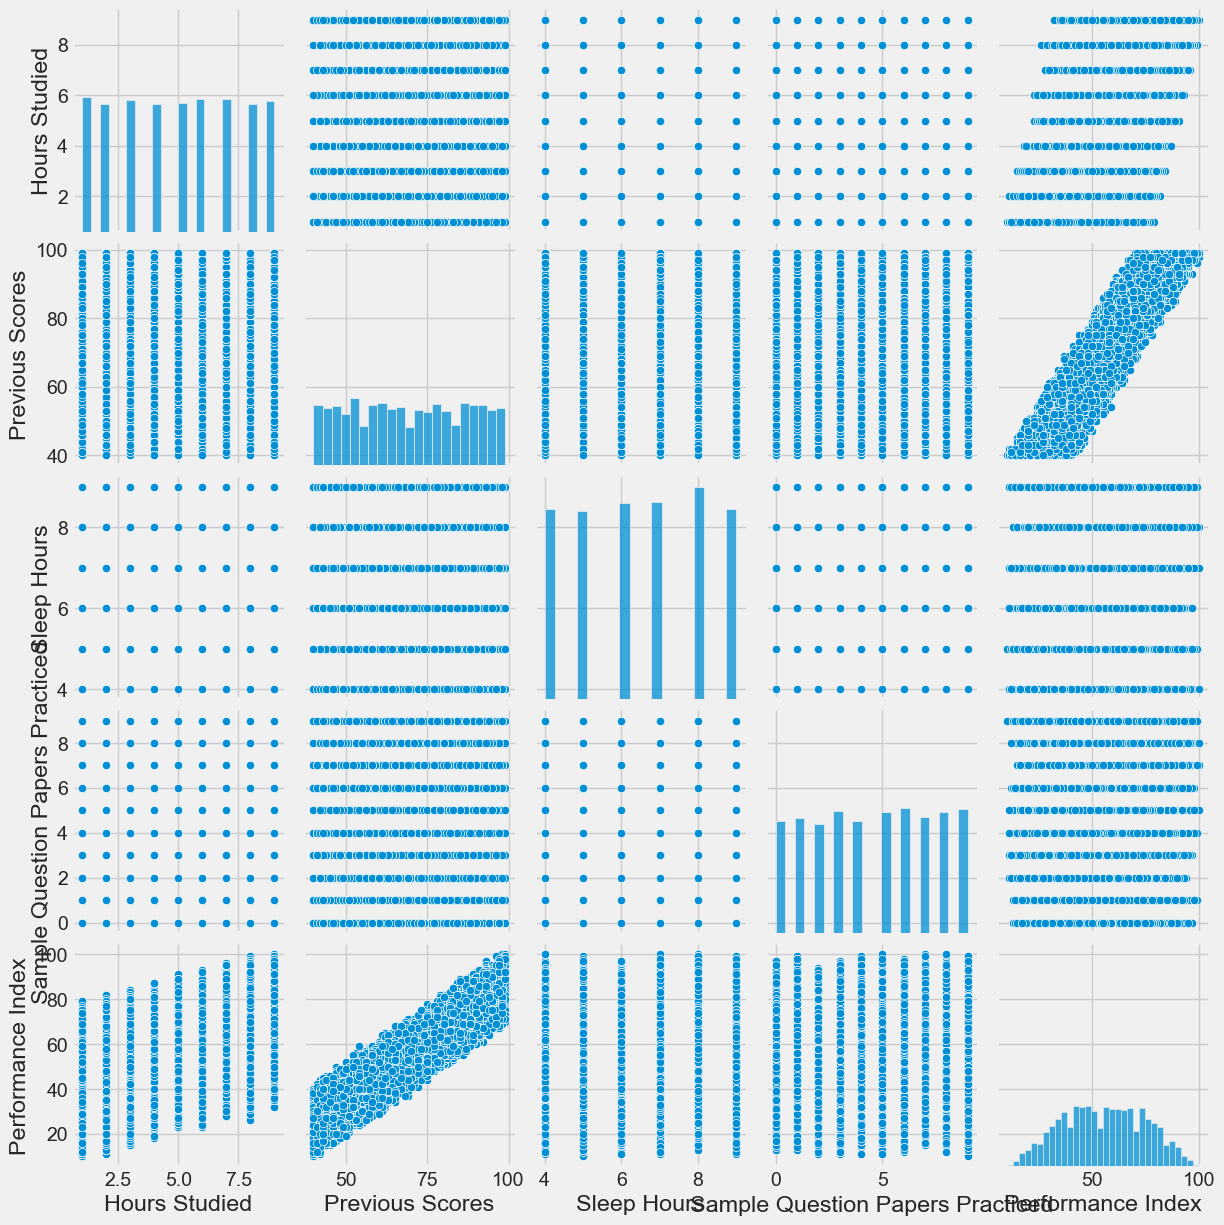

In [24]:
sns.pairplot(df)
plt.show()

El pairplot revela una fuerte correlación aparente entre las variables "Horas de estudio" y "Puntajes previos", y una posible relación con la variable "Índice de desempeño" que se considera como la variable dependiente. Este hallazgo sugiere que "Horas de estudio" y "Puntajes previos" pueden ser predictores significativos del desempeño estudiantil y podrían ser fundamentales en el análisis de regresión.

Se genera el grafico de disperción para mirar el comportamiento de los datos 

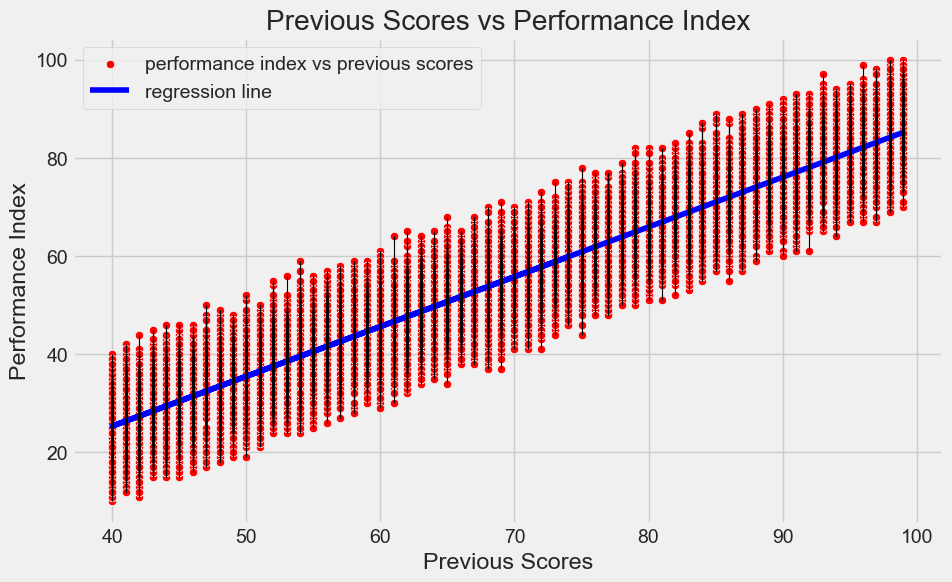

In [25]:
# Crear el gráfico de dispersión con puntos de datos en rojo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df, color='red', label='performance index vs previous scores')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df['Previous Scores'], df['Performance Index'], 1)
plt.plot(df['Previous Scores'], slope * df['Previous Scores'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df.iterrows():
    x = row['Previous Scores']
    y_actual = row['Performance Index']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs Performance Index')
plt.legend()

# Mostrar el gráfico
plt.show()

El scatterplot confirma claramente una relación lineal positiva y correlación entre las variables de "Índice de desempeño" y "Estudios previos". Esto indica una tendencia ascendente donde un aumento en "Estudios previos" tiende a asociarse con un mayor "Índice de desempeño". Este patrón es un hallazgo significativo y puede ser relevante en el análisis de regresión subsiguiente.

La ausencia de valores atípicos en los datos es un hallazgo positivo, ya que indica que no existen observaciones extremadamente alejadas de la tendencia general. Esto sugiere una mayor consistencia en los datos y puede aumentar la confiabilidad de los resultados en el análisis y el modelo de regresión subsiguientes.

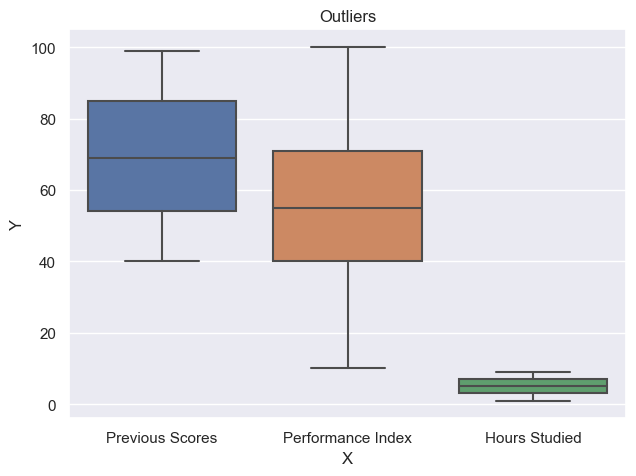

In [26]:
#find outliers using boxplot
sns.set(font_scale=1)
price_data =df[['Previous Scores','Performance Index','Hours Studied']]
sns.boxplot(data=price_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Outliers')
plt.show()

In [27]:
# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['Previous Scores', 'Hours Studied']]
y = df['Performance Index']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.488e+05
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:44:47   Log-Likelihood:                -22446.
No. Observations:               10000   AIC:                         4.490e+04
Df Residuals:                    9997   BIC:                         4.492e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -29.8168      0.105   -2

Se realizó la nueva regresión múltiple, y el coeficiente de determinación (R-cuadrado) arrojó un valor de 0.986. Este R-cuadrado próximo a 1 indica que el modelo es altamente efectivo en explicar la variabilidad de la variable dependiente mediante las variables predictoras. Es un resultado muy positivo, sugiriendo que aproximadamente el 98.6% de la variabilidad en la variable dependiente se atribuye al modelo, lo que respalda su ajuste robusto y la relevancia de las variables predictoras seleccionadas en la explicación del fenómeno.

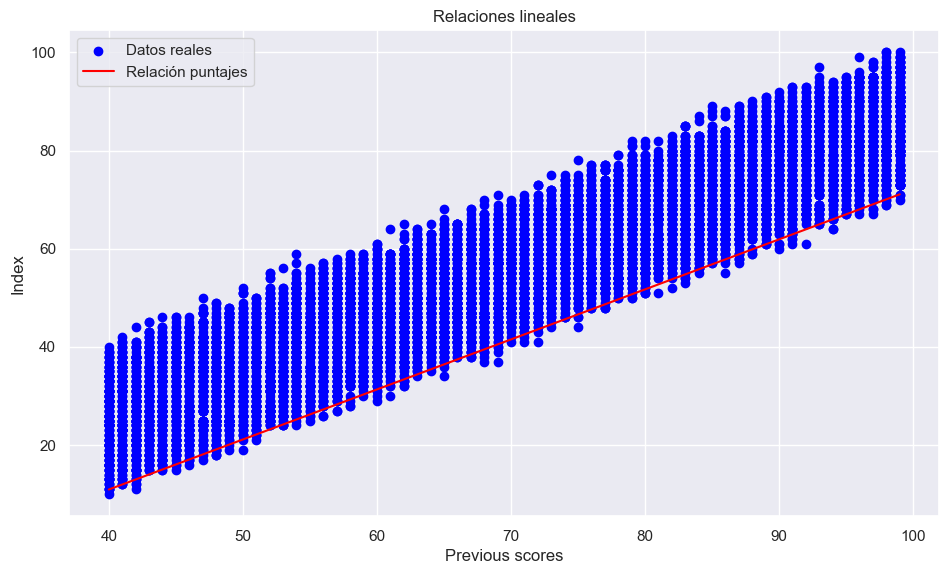

In [28]:
# Definir las variables independientes y dependientes
PerInd = df['Performance Index']
PrevScores = df['Previous Scores']
Sleephours = df['Hours Studied']

# Crear un rango de valores de "Prev Scores" para la gráfica
model_range = np.linspace(PrevScores.min(), PrevScores.max(), 100)

# Calcular las predicciones para las relaciones lineal
index_pred_scores = b0 + b1 * model_range


# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.scatter(PrevScores, PerInd, label='Datos reales', color='blue')
plt.plot(model_range, index_pred_scores, label='Relación puntajes', color='red')


# Etiquetas y título
plt.xlabel('Previous scores')
plt.ylabel('Index')
plt.title('Relaciones lineales')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


Este código se utiliza para crear un gráfico que representa una regresión lineal simple entre dos variables: el índice de desempeño (PerInd) como la variable dependiente y los puntajes previos (PrevScores) como la variable independiente. En este gráfico, se observa claramente una relación lineal entre estas dos variables, lo que sugiere que existe una conexión significativa entre los puntajes previos y el índice de desempeño.

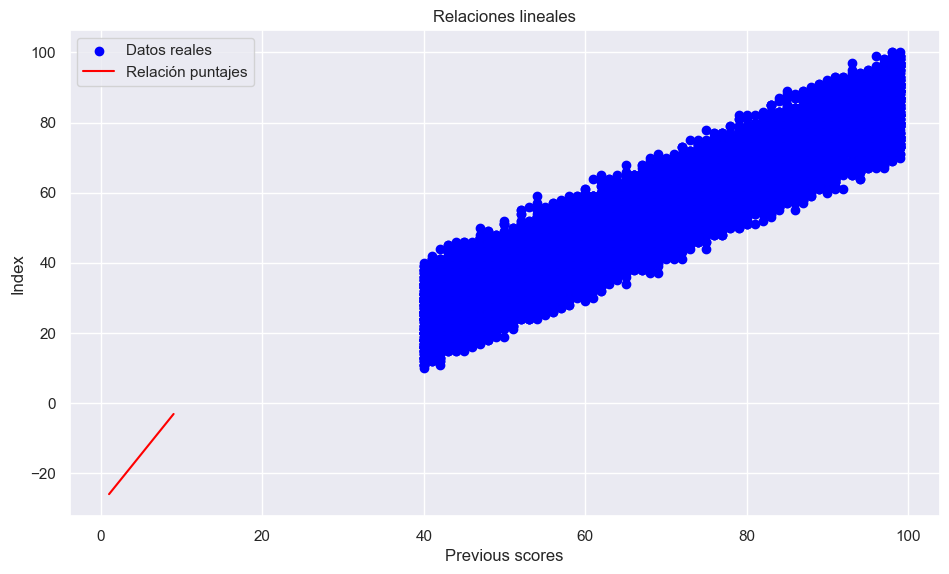

In [29]:
# Definir las variables independientes y dependientes
PerInd = df['Performance Index']
PrevScores = df['Previous Scores']
Sleephours = df['Hours Studied']

# Crear un rango de valores de "Sleep Hours" para la gráfica
model_range = np.linspace(Sleephours.min(), Sleephours.max(), 100)

# Calcular las predicciones para las relaciones lineal
index_pred_scores = b0 + b1 + b2 * model_range


# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.scatter(PrevScores, PerInd, label='Datos reales', color='blue')
plt.plot(model_range, index_pred_scores, label='Relación puntajes', color='red')


# Etiquetas y título
plt.xlabel('Previous scores')
plt.ylabel('Index')
plt.title('Relaciones lineales')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

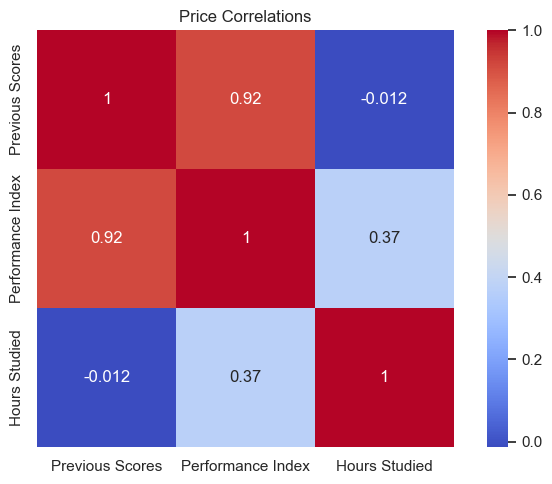

In [30]:
variables=['Previous Scores', 'Performance Index', 'Hours Studied']

correlations= df[variables].corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlations, annot= True, cmap='coolwarm',square= True)
plt.title('Price Correlations')
plt.tight_layout()
plt.show()


La generación de un mapa de calor que muestra la correlación entre las tres variables revela información valiosa. La correlación entre las variables independientes que no es evidente sugiere que no hay multicolinealidad, lo que es positivo para la calidad del modelo. La correlación entre una o ambas variables independientes y la variable dependiente indica que estas variables son importantes predictores del índice de desempeño. Esto sugiere que el modelo de regresión puede ser sólido y efectivo en la predicción del índice de desempeño sin sufrir problemas de multicolinealidad.

In [31]:
from sklearn.linear_model import LinearRegression

Coeficientes: [1.01912275 2.85763725]
Intercepto: -29.816789860385754
Coeficientes de Previous Scores, Hours Studied: [1.01912275 2.85763725]
Coeficiente de determinación (R^2): 0.9858724242382322


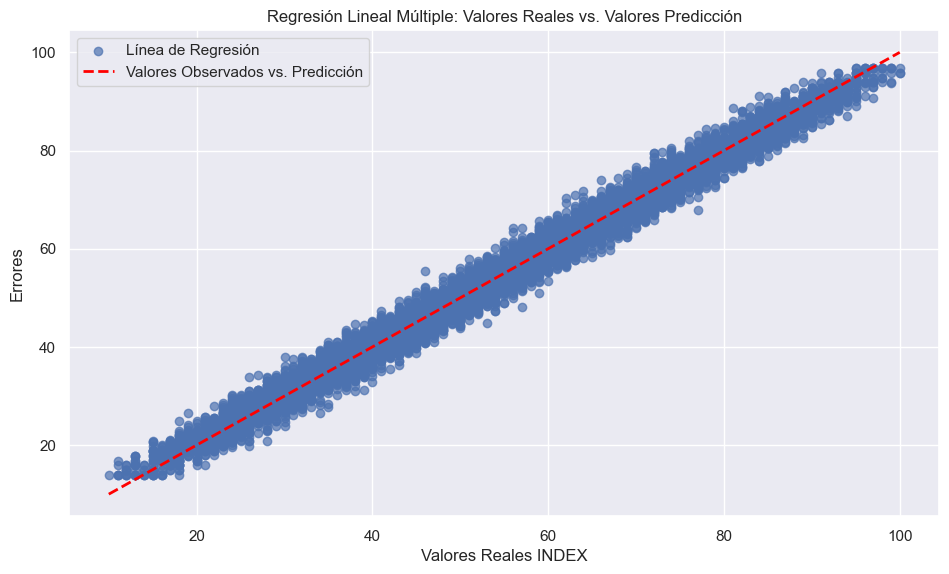

In [32]:
# Variables independientes (X) y variable dependiente (y)
x = df[['Previous Scores', 'Hours Studied']]
y = df['Performance Index']

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(x, y)

# Coeficientes de regresión y término independiente
coeficientes = model.coef_
intercepto = model.intercept_

# Imprimir los coeficientes
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)
print("Coeficientes de Previous Scores, Hours Studied:", coeficientes)

# Calcular el coeficiente de determinación (R^2)
r2 = model.score(x, y)
print("Coeficiente de determinación (R^2):", r2)

# Realizar una predicción
y_pred = model.predict(x)

# Graficar los resultados
plt.figure(figsize=(10, 6))

errors = y - y_pred


# Graficar valores reales vs. valores predichos
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Valores Reales INDEX")
plt.ylabel("Valores Predicción")
plt.ylabel('Errores')
plt.title("Regresión Lineal Múltiple: Valores Reales vs. Valores Predicción")
plt.grid(True)

# Añadir una línea de regresión
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2)
plt.legend(["Línea de Regresión", "Valores Observados vs. Predicción"])

plt.show()

Se evidencia que las predicciones del modelo de regresión se adecúan de forma apropiada a los valores observados, lo que sugiere que el modelo exhibe un ajuste adecuado y un desempeño satisfactorio en la representación de los datos.

Un R-cuadrado muy alto podría sugerir la posibilidad de sobreajuste. Para evaluar si esto es cierto, se crea un gráfico que muestra la regresión lineal y se verifica si los datos se ajustan adecuadamente a ella. En este caso, parece no haber sobreajuste, ya que los datos siguen la línea de regresión de manera razonable.

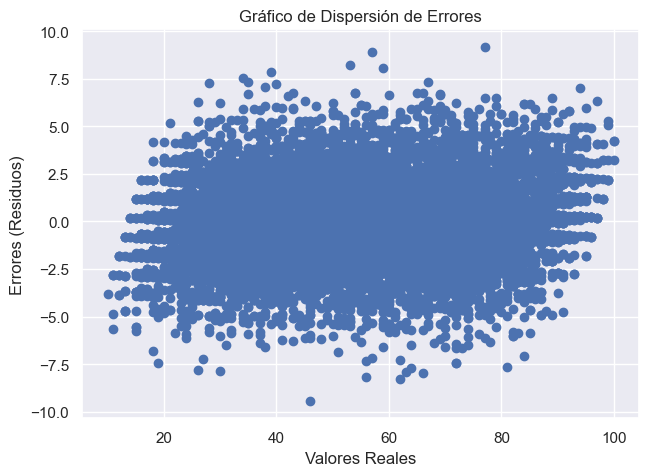

In [33]:
from sklearn.linear_model import LinearRegression

# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# y que 'target' es la columna que deseas predecir
X = df[['Previous Scores', 'Hours Studied']]
y = df['Performance Index']
model = LinearRegression()
model.fit(X, y)
predicciones = model.predict(X)

errores = y - predicciones

plt.scatter(y, errores)
plt.xlabel('Valores Reales')
plt.ylabel('Errores (Residuos)')
plt.title('Gráfico de Dispersión de Errores')


plt.show() 

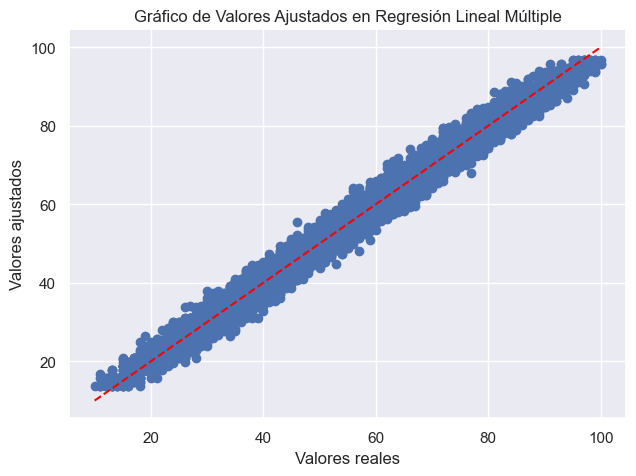

In [34]:
y_pred = model.predict(X)

# Crear el gráfico
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Valores ajustados')
plt.title('Gráfico de Valores Ajustados en Regresión Lineal Múltiple')
plt.show()

Conclusiones 

El modelo exhibe un desempeño satisfactorio al ajustarse de manera precisa a los datos disponibles. Esto, a su vez, habilita la capacidad de predecir con confianza qué estudiantes pueden alcanzar un índice de rendimiento académico particular, lo que puede ser de utilidad para satisfacer la necesidad del modelo de negocio de identificar y respaldar a los estudiantes con un potencial destacado.

Teniendo en cuenta que nuestro modelo realiza una buena predicción, podemos ofrecer ese negocio a las universidades de Colombia para que empiecen a aplicar esto como un paso anterior para ir eligiendo a los mejores estudiantes para su institución

Teniendo en cuenta el buen R^2 no solo podríamos llegar a ofrecerlo a las universidades sino que desde los colegios que tienen una visión continua y un poco más personalizada que las universidades pueden llevar a cabo una mejor orientación vocacional usando nuestro modelo y con información más realista sobre cada uno de los estudiantes podremos a futuro crear una mejor regresion con más variables ejemplo edad y más factores que influyan directamente en el índice de rendimiento de los estudiantes.

Referencias

Landing. (s/f). Edu.Co. Recuperado el 31 de agosto de 2023, de https://www.areandina.edu.co/blogs/preparate-para-tu-entrevista-de-ingreso-la-universidad

Residual plot for residual vs predicted value in Python. (s/f). Stack Overflow. Recuperado el 31 de agosto de 2023, de https://stackoverflow.com/questions/62681388/residual-plot-for-residual-vs-predicted-value-in-python


Student_Performance_index_regression. (2023, agosto 30). Kaggle.com; Kaggle. https://www.kaggle.com/code/harikrishnank369/student-performance-index-regression

Follow, I. (2022, febrero 17). How to create a residual plot in python. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/

(S/f). Github.com. Recuperado el 31 de agosto de 2023, de https://github.com/ingmpesca/td2-2023-2/blob/master/clase-4/regresion_lineal_simple.ipynb

(S/f-b). Github.com. Recuperado el 31 de agosto de 2023, de https://github.com/ingmpesca/td2-2023-2/blob/master/clase-6/problemas_regresion.ipynb


CASO 2 Extensiones de la regresión lineal

Interacción 1 (solamente usando una de las variables)

Regresion lineal simple:  
X = Previous Scores Y = Performance Index

In [35]:
#X = df[['Previous Scores', 'Hours Studied']]
#y = df['Performance Index']
# Extraer las columnas como matrices numpy
X = df['Previous Scores'].values
y = df['Performance Index'].values

# Agregar una columna de unos para la constante (intercepción)
X_matrix = np.column_stack((np.ones(X.shape[0]), X))

# Calcular los coeficientes utilizando la fórmula matricial (X^T * X)^(-1) * X^T * y
coefficients = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

# Calcular las predicciones
predictions = X_matrix @ coefficients

# Calcular el error residual
residuals = y - predictions

# Grados de libertad
n = len(y)
p = X_matrix.shape[1] - 1
dof = n - p - 1

# Calcular el error estándar residual (residual standard error)
residual_std_error = np.sqrt(np.sum(residuals**2) / dof)

# Calcular el coeficiente de determinación R2
total_sum_squares = np.sum((y - np.mean(y))**2)
explained_sum_squares = np.sum((predictions - np.mean(y))**2)
r_squared = explained_sum_squares / total_sum_squares

# Calcular la estadística F
f_statistic = (explained_sum_squares / p) / (residuals.T @ residuals / dof)

# Crear una tabla con los resultados
results_table = pd.DataFrame({
    'Coeficiente': coefficients,
    'Error estándar': np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Estadístico t': coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Valor p': 2 * (1 - stats.t.cdf(np.abs(coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2)), dof)),
}, index=['Intercepto', 'TV'])

print("Resultados de la Regresión:")
print(results_table)
print("\nResidual Standard Error:", residual_std_error)
print("Coeficiente de determinación R2:", r_squared)
print("Estadística F:", f_statistic)

Resultados de la Regresión:
            Coeficiente  Error estándar  Estadístico t  Valor p
Intercepto   -15.181799        0.319605     -47.501729      0.0
TV             1.013837        0.004465     227.057504      0.0

Residual Standard Error: 7.743520827128636
Coeficiente de determinación R2: 0.837571164218802
Estadística F: 51555.110024552225


In [36]:
df_new = pd.DataFrame(df)

# Añadir una columna de unos para el término de intercepción
df_new['intercept'] = 1

# Definir las variables independiente (X) y dependiente (y)
X = df_new['Previous Scores']
y = df_new['Performance Index']
print(X.head())
# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())

0    99
1    82
2    51
3    52
4    75
Name: Previous Scores, dtype: int64
                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.552e+05
Date:                Tue, 05 Sep 2023   Prob (F-statistic):                        0.00
Time:                        21:45:02   Log-Likelihood:                         -35674.
No. Observations:               10000   AIC:                                  7.135e+04
Df Residuals:                    9999   BIC:                                  7.136e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err       

In [37]:
X = df_new['Previous Scores']
y = df_new['Performance Index']

# Agregar una constante (intercepción) a la matriz X
X = sm.add_constant(X)

# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 5.156e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:45:02   Log-Likelihood:                -34657.
No. Observations:               10000   AIC:                         6.932e+04
Df Residuals:                    9998   BIC:                         6.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.1818      0.320    -

El primer modelo tiene un R^2 de 0.98, lo que indica que explica aproximadamente el 98% de la variabilidad en los datos de la variable dependiente utilizando la variable independiente.
El segundo modelo tiene un R^2 de 0.83, lo que significa que explica aproximadamente el 83% de la variabilidad en los datos. Aunque este valor es un poco más bajo que el del primer modelo, aún es relativamente alto. En resumen, el primer modelo tiene un R^2 más alto y, por lo tanto, explica una mayor cantidad de variabilidad en los datos en comparación con el segundo modelo.

Interacción 2 (Usando una de las varialbes, horas de estudio)
Regresion lineal simple:
X = Hours Studied Y = Performance Index

In [38]:
#X = df[['Previous Scores', 'Hours Studied']]
#y = df['Performance Index']
# Extraer las columnas como matrices numpy
X = df['Hours Studied'].values
y = df['Performance Index'].values

# Agregar una columna de unos para la constante (intercepción)
X_matrix = np.column_stack((np.ones(X.shape[0]), X))

# Calcular los coeficientes utilizando la fórmula matricial (X^T * X)^(-1) * X^T * y
coefficients = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

# Calcular las predicciones
predictions = X_matrix @ coefficients

# Calcular el error residual
residuals = y - predictions

# Grados de libertad
n = len(y)
p = X_matrix.shape[1] - 1
dof = n - p - 1

# Calcular el error estándar residual (residual standard error)
residual_std_error = np.sqrt(np.sum(residuals**2) / dof)

# Calcular el coeficiente de determinación R2
total_sum_squares = np.sum((y - np.mean(y))**2)
explained_sum_squares = np.sum((predictions - np.mean(y))**2)
r_squared = explained_sum_squares / total_sum_squares

# Calcular la estadística F
f_statistic = (explained_sum_squares / p) / (residuals.T @ residuals / dof)

# Crear una tabla con los resultados
results_table = pd.DataFrame({
    'Coeficiente': coefficients,
    'Error estándar': np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Estadístico t': coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Valor p': 2 * (1 - stats.t.cdf(np.abs(coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2)), dof)),
}, index=['Intercepto', 'TV'])

print("Resultados de la Regresión:")
print(results_table)
print("\nResidual Standard Error:", residual_std_error)
print("Coeficiente de determinación R2:", r_squared)
print("Estadística F:", f_statistic)

Resultados de la Regresión:
            Coeficiente  Error estándar  Estadístico t  Valor p
Intercepto    41.379175         0.38712     106.889763      0.0
TV             2.773063         0.06883      40.288723      0.0

Residual Standard Error: 17.821257047367705
Coeficiente de determinación R2: 0.139674375033391
Estadística F: 1623.1812247113326


In [39]:
df_new = pd.DataFrame(df)

# Añadir una columna de unos para el término de intercepción
df_new['intercept'] = 1

# Definir las variables independiente (X) y dependiente (y)
X = df_new['Hours Studied']
y = df_new['Performance Index']
print(X.head())
# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())

0    7
1    4
2    8
3    5
4    7
Name: Hours Studied, dtype: int64
                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                          4.024e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):                        0.00
Time:                        21:45:02   Log-Likelihood:                         -46803.
No. Observations:               10000   AIC:                                  9.361e+04
Df Residuals:                    9999   BIC:                                  9.361e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t     

In [40]:
X = df_new['Hours Studied']
y = df_new['Performance Index']

# Agregar una constante (intercepción) a la matriz X
X = sm.add_constant(X)

# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:45:02   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.3792      0.387    106.890

El tercer modelo tiene un R^2 de 0.14, lo que indica una baja capacidad para explicar la variabilidad de los datos. Sumando los R^2 de los modelos comparativos anteriores, obtenemos un total de 0.98, lo que representa el porcentaje de variabilidad explicado por estos dos modelos en relación con el modelo inicial, que tiene un R^2 de 0.98. En conjunto, los modelos comparativos aún están lejos de igualar la capacidad explicativa del modelo inicial.

Ninguna de las interacciones aplicadas al modelo incial, generaron un mayor desempeño del mismo, por este motivo podemos indicar que el modelo del caso 1 es mejor.

Interacciones Efectos cuadrados con Previous Scores

In [41]:
df['Previous Scores^2'] = df["Previous Scores"] ** 2


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['Previous Scores', 'Previous Scores^2']]
y = df['Performance Index']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 2.577e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:45:02   Log-Likelihood:                -34657.
No. Observations:               10000   AIC:                         6.932e+04
Df Residuals:                    9997   BIC:                         6.934e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -15.1710      1.35

In [42]:
df['Previous Scores^3'] = df["Previous Scores"] ** 3


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['Previous Scores', 'Previous Scores^3']]
y = df['Performance Index']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 2.577e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:45:02   Log-Likelihood:                -34657.
No. Observations:               10000   AIC:                         6.932e+04
Df Residuals:                    9997   BIC:                         6.934e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -15.1864      0.95

In [43]:
df['Previous Scores^5'] = df["Previous Scores"] ** 5


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['Previous Scores', 'Previous Scores^5']]
y = df['Performance Index']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 2.577e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:45:02   Log-Likelihood:                -34657.
No. Observations:               10000   AIC:                         6.932e+04
Df Residuals:                    9997   BIC:                         6.934e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -15.2164      0.65

In [44]:
df['Previous Scores^10'] = df["Previous Scores"] ** 10


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['Previous Scores', 'Previous Scores^10']]
y = df['Performance Index']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                      -8.157
Model:                            OLS   Adj. R-squared:                 -8.157
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 05 Sep 2023   Prob (F-statistic):                nan
Time:                        21:45:02   Log-Likelihood:                -54817.
No. Observations:               10000   AIC:                         1.096e+05
Df Residuals:                    9999   BIC:                         1.096e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.323e-38   4.94

Interacciones 
Efectos cuadrados con la variable 'Hours Studied'

In [45]:
df['Hours Studied^2'] = df["Hours Studied"] ** 2


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['Hours Studied', 'Hours Studied^2']]
y = df['Performance Index']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     812.2
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:45:03   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9997   BIC:                         8.601e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              40.7769      0.674     

In [46]:
df['Hours Studied^3'] = df["Hours Studied"] ** 3


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['Hours Studied', 'Hours Studied^3']]
y = df['Performance Index']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     812.3
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:45:03   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9997   BIC:                         8.601e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              40.8971      0.567     

In [47]:
df['Hours Studied^5'] = df["Hours Studied"] ** 5


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['Hours Studied', 'Hours Studied^5']]
y = df['Performance Index']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     812.4
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:45:03   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9997   BIC:                         8.601e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              41.0120      0.491     

In [48]:
df['Hours Studied^10'] = df["Hours Studied"] ** 10


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['Hours Studied', 'Hours Studied^10']]
y = df['Performance Index']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     812.4
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:45:03   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9997   BIC:                         8.601e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               41.1100      0.442  

Después de haber probado como las interaciones exponenciales afectan a las varibles en el desempeño del modelo, podemos concluir que la relacion que tienen estas son estrictamente lineales. Ya que ninguna de las interacciones aplicadas a las variables ('Previous Scores', 'Hours Studied') elevadas a las diferentes potencias (^2, ^3, ^5, ^10) tienen implicaciones positivas en los resultados finales del modelo. 

En este caso, el modelo incial (caso 1) resulta un mejor modelo en tanto tiene mejor desempeño en su R^2. Esto nos indica directamente que no es necesario elevar ninguna variable y esto se da precisamente porque los resultados de las interacciones cuadráticas no logran superar el desempeño del primer modelo dada sus relaciones lineales.

Bootstrap

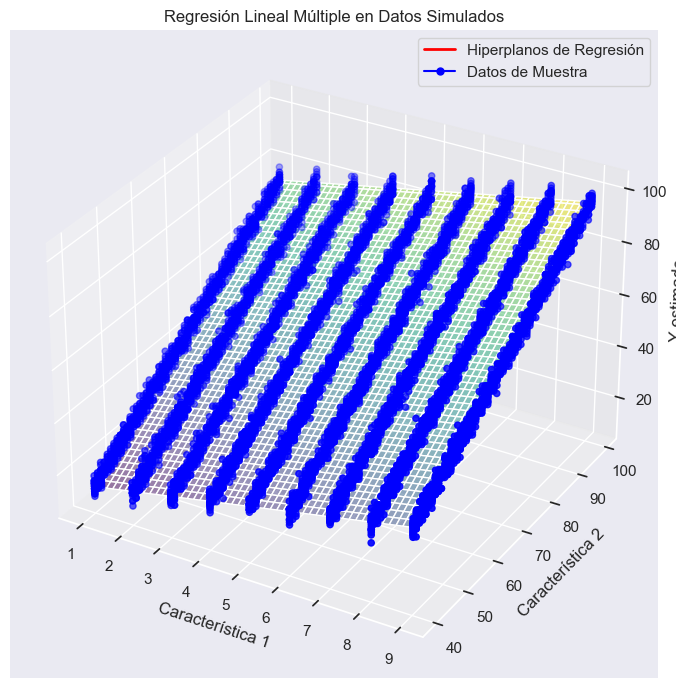

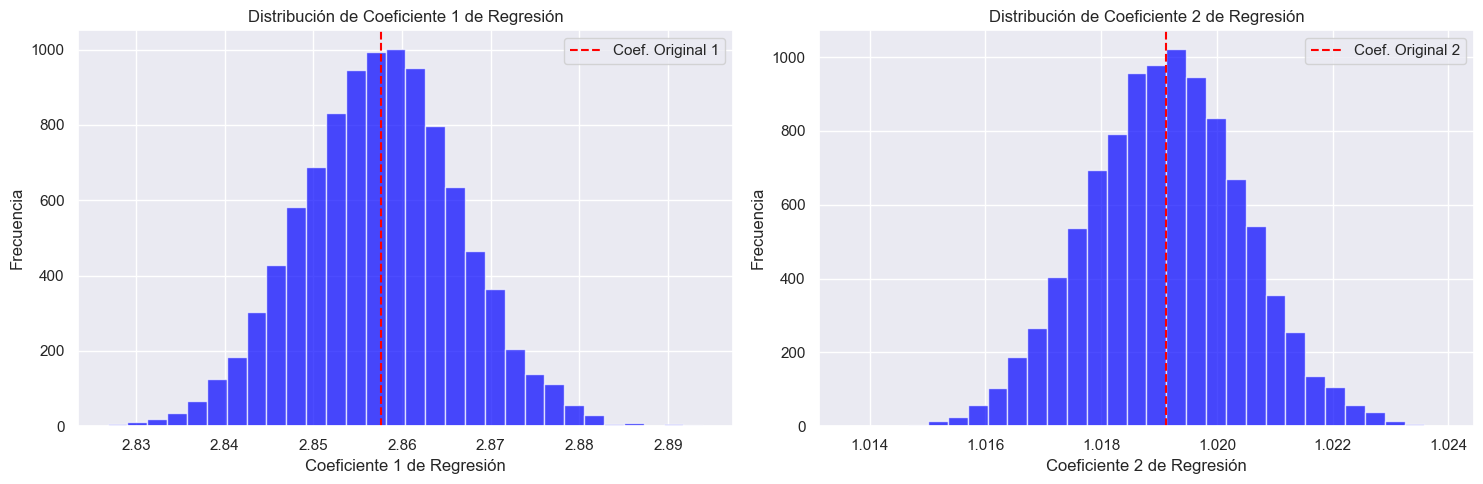

Resultados de los coeficientes Bootstrap:
Coeficiente 1: Media = 2.8576, Desviación Estándar = 0.0089
Coeficiente 2: Media = 1.0191, Desviación Estándar = 0.0013


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal múltiple a los datos originales
model = LinearRegression()
X_multiple = df[['Hours Studied', 'Previous Scores']]  # Características
y = df['Performance Index']  # Objetivo
model.fit(X_multiple, y)
coef_originales = model.coef_
intercept_original = model.intercept_

# Visualizar los datos originales y los hiperplanos de regresión de cada característica en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Hours Studied'], df['Previous Scores'], df['Performance Index'], c='blue', label='Datos de Muestra')

# Calcular los hiperplanos de regresión para cada característica
x1_grid = np.linspace(df['Hours Studied'].min(), df['Hours Studied'].max(), 100)
x2_grid = np.linspace(df['Previous Scores'].min(), df['Previous Scores'].max(), 100)
X1_grid, X2_grid = np.meshgrid(x1_grid, x2_grid)

# Calcular los valores de Z (objetivo estimado) para la superficie de regresión
Z_grid = intercept_original + coef_originales[0] * X1_grid + coef_originales[1] * X2_grid

# Graficar los hiperplanos de regresión
ax.plot_surface(X1_grid, X2_grid, Z_grid, cmap='viridis', alpha=0.5)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Y estimado')
ax.set_title('Regresión Lineal Múltiple en Datos Simulados')

# Crear una leyenda manualmente
ax.legend(handles=[plt.Line2D([0], [0], color='red', lw=2, label='Hiperplanos de Regresión'),
                   plt.Line2D([0], [0], marker='o', color='blue', label='Datos de Muestra', markersize=5)],
          loc='best')

plt.show()

# Aplicar Bootstrap para estimar los coeficientes de regresión múltiple
num_bootstrap_samples = 10000  # Número de muestras Bootstrap
bootstrap_coefs = []
bootstrap_intercept = []

for _ in range(num_bootstrap_samples):
    # Generar una muestra bootstrap
    bootstrap_data = df.sample(frac=1, replace=True)  # Mezclar y tomar muestras con reemplazo
    X_bootstrap = bootstrap_data[['Hours Studied', 'Previous Scores']]
    y_bootstrap = bootstrap_data['Performance Index']

    # Ajustar un modelo de regresión lineal múltiple a la muestra bootstrap
    model.fit(X_bootstrap, y_bootstrap)
    bootstrap_coefs.append(model.coef_)
    bootstrap_intercept.append(model.intercept_)

# Visualizar las distribuciones de los coeficientes de regresión múltiple
plt.figure(figsize=(15, 5))

for i in range(2):
    plt.subplot(1, 2, i + 1)
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    plt.hist(bootstrap_coefs_i, bins=30, color='blue', alpha=0.7)
    plt.axvline(x=coef_originales[i], color='red', linestyle='--', label=f'Coef. Original {i + 1}')
    plt.xlabel(f'Coeficiente {i + 1} de Regresión')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de Coeficiente {i + 1} de Regresión')
    plt.legend()

plt.tight_layout()
plt.show()

# Imprimir los resultados de los coeficientes Bootstrap
print("Resultados de los coeficientes Bootstrap:")
for i, coef_name in enumerate(['Coeficiente 1', 'Coeficiente 2']):
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    mean_coef_bootstrap = np.mean(bootstrap_coefs_i)
    std_coef_bootstrap = np.std(bootstrap_coefs_i)
    print(f"{coef_name}: Media = {mean_coef_bootstrap:.4f}, Desviación Estándar = {std_coef_bootstrap:.4f}")

Es necesario mencionar que la aplicación del método bootstrap no es del todo necesaria dado que este no ofrece una mejor explicación frente a la que nos dió el modelo incial (caso 1). Sin embargo, una aplicación de este modelo nos asegura un modelo más robusto, en donde se relacionan diferentes muestras aleatorias para llegar a una conclusion similar. Lo que nos da mayor seguridad en nuestras conclusiones.

Con los datos anteriores podemos hacer las siguientes conclusiones:

La cantidad de horas de estudio (X1) tiene un coeficiente positivo significativo de aproximadamente 2.8576 en el modelo de regresión. Esto sugiere que, en promedio, por cada hora adicional de estudio, se espera un aumento de aproximadamente 2.8576 unidades en el índice de rendimiento de los estudiantes (variable y).

Las calificaciones previamente obtenidas (X2) también tienen un coeficiente positivo significativo de aproximadamente 1.0191 en el modelo de regresión. Esto indica que, en promedio, un aumento de una unidad en las calificaciones previas se asocia con un aumento de aproximadamente 1.0191 unidades en el índice de rendimiento de los estudiantes (variable y).

Ambos coeficientes sugieren que tanto el tiempo dedicado al estudio como las calificaciones previas tienen un impacto positivo en el rendimiento de los estudiantes. Además, las pequeñas desviaciones estándar bootstrap indican que estas conclusiones son bastante consistentes y robustas en diferentes muestras Bootstrap.

En resumen, basándonos en los resultados obtenidos, podemos concluir que el tiempo de estudio y las calificaciones previas son factores importantes y positivamente asociados con el rendimiento de los estudiantes en el modelo de regresión lineal múltiple.

El modelo de regresión lineal múltiple utilizado en este contexto se puede describir como un método de "evaluación predictiva" para ayudar en el proceso de aceptación o rechazo de estudiantes en educación superior. Este método se utiliza para estimar el posible rendimiento académico de un estudiante en función de las características proporcionadas (en este caso, la cantidad de horas de estudio y las calificaciones previamente obtenidas) y, en función de esa estimación, tomar una decisión sobre la aceptación o el rechazo. Basándose en las predicciones del modelo, la institución educativa establece un criterio para la aceptación o el rechazo de estudiantes. Este criterio puede variar según las políticas y los objetivos de la institución.

En resumen, este modelo de regresión lineal múltiple se utiliza como una herramienta cuantitativa para evaluar el potencial académico de los estudiantes en función de las características proporcionadas. Sin embargo, es importante destacar que este enfoque debe ser complementado con una evaluación holística que considere aspectos adicionales y tenga en cuenta la diversidad y las necesidades individuales de los estudiantes.


PUNTO 3

¿Qué sucede cuando se presentan conflictos al hacer un merge entre 2 ramas(branches)? ¿Como se debe solucionar?

Para responder esta pregunta, debemos comprender primero como trabaja el controlador de versiones de GIT por ello utilizamos la Imagen 1 para entender los usos y las principales características de GIT, para esta pregunta lo más importante que debemos entender es que GIT trabaja con ramas y de forma colaborativa.

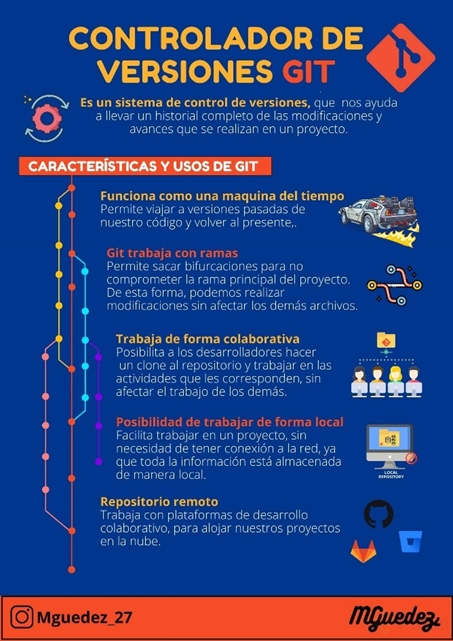
 
(Mguedez_27 Platzi,2020) Imagen 1

Para continuar comprendiendo el problema debemos entender por qué se presentan los problemas al hacer merge entre dos ramas y basándonos en (Atlassiano, 2023) en el que nos dicen que normalmente los conflictos surgen cuando dos personas han cambiado las mismas líneas de un archivo o si un desarrollador ha eliminado un archivo mientras otro lo estaba modificando. En estos casos, Git no puede determinar automáticamente qué es correcto. Los conflictos solo afectan al desarrollador que realiza la fusión, el resto del equipo no se entera del conflicto. Git marcará el archivo como que tiene un conflicto y detendrá el proceso de fusión. Entonces el desarrollador es el responsable de resolver el conflicto; este es el que más se presenta sin embargo encontramos otros motivos para presentarse estos problemas al hacer merge los cuales son:

2.	Cambios incompatibles: A veces, los cambios en una rama pueden depender de ciertas condiciones o código que no existe en la otra rama. Esto puede llevar a problemas de fusión si no se manejan adecuadamente. 
3.	Cambios en la estructura del proyecto: Si una rama realiza cambios significativos en la estructura del proyecto, como renombrar directorios o archivos, esto puede generar problemas al fusionarla con otra rama que no tiene esos cambios.
4.	Divergencia prolongada: Si dos ramas han estado divergiendo durante un largo período y han acumulado numerosos cambios, puede ser más difícil fusionarlas sin conflictos.
5.	Errores en el proceso de fusión: A veces, los problemas pueden ser causados por errores humanos al realizar el proceso de fusión, como seleccionar la rama incorrecta como destino o no tener los permisos adecuados.
Por último queremos saber como solucionarlo, para ello queremos basarnos en la Imagen 2 ya que en una sola imagen expone el autor del comentario muchas de las soluciones para este problema y nos muestra la aplicación de los comandos que son útiles para solucionar estos conflictos uno de los que más resalto es el último el cual consiste en tener una comunicación clara entre los miembros o desarrolladores que estén trabajando en el archivo.

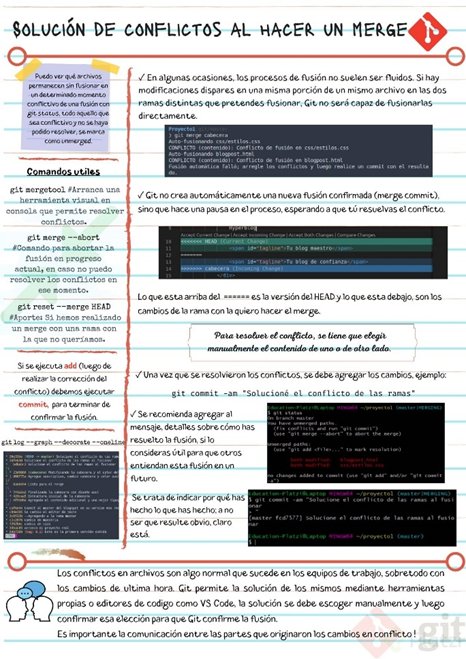 

(Comentario clase en Platzi, Recuperado en 2023) Imagen 2

En resumen, cuando se presentan conflictos entre dos ramas en Git, es importante resolverlos de manera colaborativa y siguiendo las mejores prácticas de control de versiones. La comunicación efectiva y la comprensión de las herramientas de Git son fundamentales para manejar conflictos de manera eficiente.


REFERENCIAS

(S/f). Platzi.com. Recuperado el 6 de septiembre de 2023, de https://platzi.com/clases/1557-git-github/19934-por-que-usar-un-sistema-de-control-de-versiones-co/

Atlassian. (s/f). Conflictos de Git merge. Atlassian. Recuperado el 6 de septiembre de 2023, de https://www.atlassian.com/es/git/tutorials/using-branches/merge-conflicts

(S/f). Platzi.com. Recuperado el 6 de septiembre de 2023, de https://static.platzi.com/media/user_upload/conflictos-d8146830-4f72-41de-942a-f6476594e91d.jpg

(S/f-b). Platzi.com. Recuperado el 6 de septiembre de 2023, de https://static.platzi.com/media/user_upload/Git%20y%20Github-c6368c2f-ee95-4086-8924-0ccf5ec54f82.jpg
